In [1]:
#import dependencies
from jax.config import config
config.update("jax_enable_x64", True)
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt
#from tensorflow_probability.substrates.jax.internal.dtype_util


import pandas as pd
data = pd.read_pickle('/home/dkn16/data.pkl')
FGnopol = data.beam.foregrounds.all_nopol
FGpol = data.beam.foregrounds.pleak
HI = data.beam.HI
noise = data.beam.noise
freqs = data.freqs

In [3]:
cosmos = jnp.array(HI+noise)[0:256,0:256,0:256].astype(jnp.float64)
cosmos = cosmos - jnp.mean(cosmos,axis=(0,1))
selected = np.concatenate([np.arange(64),np.arange(32)+128,np.arange(32)+224])
cosmos = cosmos[:,:,selected]
#cosmos = cosmos.reshape((250*250,256))
#del predicted_data

pred_HGP = np.mean(np.load('/scratch/dkn16/result_hgp_pol_rfi0.5.npy'),axis=0)*1000
pred_HGP_nopol = np.mean(np.load('/scratch/dkn16/result_hgp_nopol_rfi0.5.npy'),axis=0)*1000
print(pred_HGP_nopol.shape)
#pred_HGP = np.mean(np.load('/scratch/dkn16/result_superpixel_hgp_pol_noise50.npy'),axis=0)*1000
pred_CP = np.load('/scratch/dkn16/result_CP_rfi0.5.npy')*1000
pred_NP_nopol = np.mean(np.load('/scratch/dkn16/result_np_nopol_rfi0.5.npy'),axis=0)*1000
pred_NP = np.mean(np.load('/scratch/dkn16/result_np_pol_suppix1_rfi0.5.npy'),axis=0)*1000

(256, 256, 128)


In [2]:
dim = 256
freqs = 256

#resize the training data
cosmos = jnp.array(HI+noise)[0:dim,0:dim,0:freqs].astype(jnp.float64)
cosmos = cosmos - jnp.mean(cosmos,axis=(0,1))
cosmos = cosmos[:,:,:]

pred_HGP = np.mean(np.load('/scratch/dkn16/result_hgp_pol.npy'),axis=0)*1000 # read results of all models
pred_HGP_nopol = np.mean(np.load('/scratch/dkn16/result_hgp_nopol.npy'),axis=0)*1000
pred_CP = np.load('/scratch/dkn16/result_CP.npy')*1000

pred_NP = np.mean(np.load('/scratch/dkn16/result_np_pol_suppix1.npy'),axis=0)*1000

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)

1


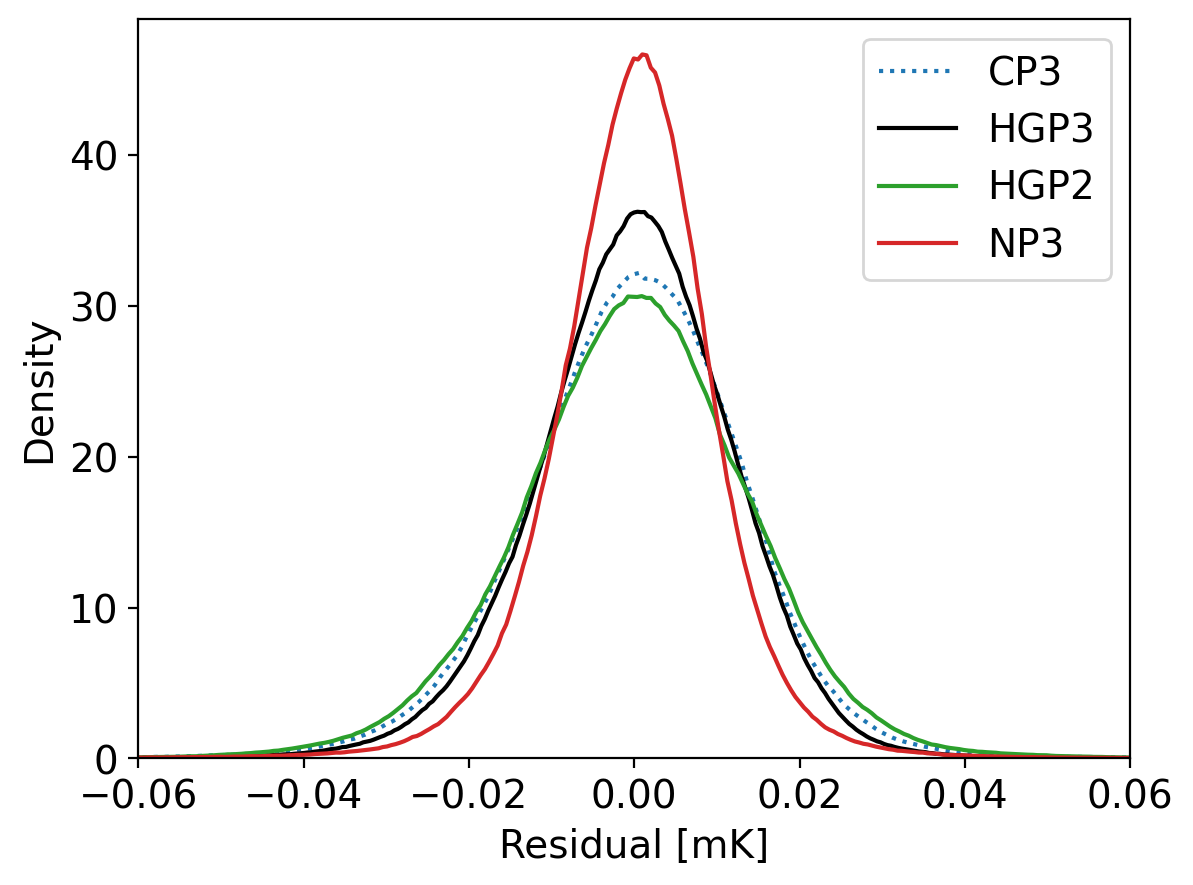

In [4]:
plt.style.use('default')

font = {"size": 14, "family": "sans-serif"}
axislabelfontsize = "x-large"
plt.rc("font", **font)

plt.figure(dpi=200)

predicted_data = pred_CP
residuals = (predicted_data - cosmos)
data = np.array(residuals.reshape((-1)))
ax3 = sns.kdeplot(data,linestyle = ':',bw_adjust=.25,gridsize=500,)

#count,bins,_ = plt.hist(data,bins=200)
predicted_data = pred_HGP
residuals = (predicted_data - cosmos)
data = np.array(residuals.reshape((-1)))
#count,bins,_ = plt.hist(data,bins=200,alpha=0.3)
ax1 = sns.kdeplot(data,bw_adjust=.25,gridsize=500,color='black')
print(1)

predicted_data = pred_HGP_nopol
residuals = (predicted_data - cosmos)
data = np.array(residuals.reshape((-1)))
ax4 = sns.kdeplot(data,bw_adjust=.25,gridsize=500,color='tab:green')

predicted_data = pred_NP
residuals = (predicted_data - cosmos)
data = np.array(residuals.reshape((-1)))
ax2 = sns.kdeplot(data,bw_adjust=.25,gridsize=500,color='tab:red')



plt.xlim(-0.06,0.06)
plt.legend(['CP3','HGP3','HGP2','NP3' ])
#plt.legend(['CP','HGP','NP' ])
plt.xlabel('Residual [mK]')
#plt.ylabel('PDF')
plt.savefig('Residuals.pdf',bbox_inches = 'tight')

In [8]:
jnp.std(pred_CP - cosmos)

DeviceArray(0.01409225, dtype=float64)